In [10]:
#imports
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cycler
from matplotlib.ticker import StrMethodFormatter
from matplotlib.axis import Axis
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties
import sqlite3 as sq
from functools import reduce
#settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 150)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
import sys
sys.path.append("../../Functions and Dictionaries/") # Adds higher directory to python modules path
import geodict
namestocommon = geodict.namestocommon

In [11]:
import vizfunctions2
prettypercentchange = vizfunctions2.prettypercentchange #single viz per x axis unit datalabels, active inputs: xoffset, yoffset, labelformat
percentchange = vizfunctions2.percentchange #double viz per x axis unit datalabels, active inputs: xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size
percent = vizfunctions2.percent
percentchange = vizfunctions2.percentchange
realchange = vizfunctions2.realchange

In [12]:
import changefunctions
calculate_changes = changefunctions.calculate_changes
generate_time_frames = changefunctions.generate_time_frames

In [13]:
import vizfunctions
#allheaders = vizfunctions.allheaders
#howwide = vizfunctions.howwide
tablecolors = vizfunctions.tablecolors
#allheadersmerged = vizfunctions.allheadersmerged
#makeinvisible = vizfunctions.makeinvisible
mergecells = vizfunctions.mergecells
mergemultcells = vizfunctions.mergemultcells

In [14]:
#data labels functions
def singledatalabels(xoffset, yoffset, labelformat, n, start_idx=0):
    for idx, (j, k) in enumerate(zip(x, y)):
        if idx >= start_idx and (idx - start_idx) % n == 0:
            label = labelformat.format(k)
            plt.annotate(label, (j, k), textcoords='offset points', xytext=(xoffset, yoffset), ha='center')
boxstyleinput = "round,pad=-0.060,rounding_size=0.15"
def roundedboxes(boxstyleinput):
    new_patches = []
    for patch in reversed(ax.patches):
        bb = patch.get_bbox()
        color=patch.get_facecolor()
        p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),abs(bb.width), abs(bb.height),boxstyle=boxstyleinput, ec="none", fc=color, mutation_aspect=1)
        patch.remove()
        new_patches.append(p_bbox)
    for patch in new_patches:
        ax.add_patch(patch)
def howwide(width):
    ['None' for x in range(width)]
def howlong(indexlength):
    ["None" for x in range(indexlength)]
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheadersmerged(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in doublecols:
            cell.set_edgecolor(col1)
        elif cell_text in column_headers:
            cell.set_edgecolor(None)
        else:
            cell.set(edgecolor=col2)
        if cell_text in column_headers:
            cell.visible_edges = 'B'
        elif cell_text in row_headers:
            cell.visible_edges = edge2
        elif cell_text in col_names:
            cell.visible_edges = 'LR'
        if cell_text in row_headers\
        or cell_text in doublecols:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#function to make figure invisible for tables
guy1, guy2, guy3 = False, 'off', 'tight'
def makeinvisible(guy1, guy2, guy3):
    return fig.patch.set_visible(guy1), ax.axis(guy2), ax.axis(guy3)
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheaders(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in column_headers:
            cell.set_edgecolor(col1)
        else:
            cell.set(edgecolor=col2)
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in column_headers:
            cell.visible_edges = edge1
        elif cell_text in row_headers:
            cell.visible_edges = edge2
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in row_headers\
        or cell_text in column_headers:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#stacked bar labels function
belowstackedbarlabels, abovestackedbarlabels = -5, 2
def stackedbarlabels(locationoffset):
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + locationoffset, str(float(round(bar.get_height(), 1))) + '%', ha='center')
def doubledatalabels(xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size):
    for j, k in zip(xpos, y1):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset1, yoffset1), fontsize = size, ha = 'center')
    for j, k in zip(xpos, y2):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset2, yoffset2), fontsize = size, ha = 'center')

In [15]:
#Set branding parameters
GNRCDARKBLUE, GNRCLIGHTBLUE, GNRCORANGE, GNRCCOOLGRAY= '#00263E', '#6DB0C7', '#EB7525', '#7B7E85'
C1, C2, C3, C4, C5, C6, C7, C8, C9 = '#314454', '#597952', '#66a141', '#0f2e39', '#dcdedf', '#797e80', '#535455', '#30523b', '#8494a4'
TABLECOL1, TABLECOL2 = '#E1EFF2', '#F4F9F9'
GNRCFONTONE, GNRCFONTTWO, GNRCFONTTHREE = 'Calibri', 'DIN Condensed', 'Palatino Linotype'
SMALLER_SIZE, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE, BIGGEST_SIZE = 10, 11, 13, 18, 20
#Update the default style sheet using rcparams
plt.rcParams.update({'font.size': SMALL_SIZE, 'font.weight': 'normal', 'axes.titlesize': BIGGER_SIZE, 'axes.labelsize': MEDIUM_SIZE, 'xtick.labelsize': SMALL_SIZE, 
'ytick.labelsize': SMALL_SIZE, 'legend.fontsize': SMALL_SIZE, 'font.family': GNRCFONTONE, 'axes.facecolor': 'None', 'figure.figsize': (10, 5), 
'figure.facecolor': 'None', 'figure.edgecolor': 'None', 'figure.autolayout': True, 'figure.dpi': 500, 'axes.grid': False, 'axes.grid.which': 'major', 
'axes.axisbelow': True, 'text.color': GNRCDARKBLUE, 'axes.labelcolor': GNRCDARKBLUE, 'xtick.color': GNRCCOOLGRAY, 'ytick.color': GNRCCOOLGRAY, 
'axes.labelpad': 15, 'axes.titlepad': 20, 'grid.color': GNRCCOOLGRAY, 'grid.linestyle': '-', 'grid.alpha': '0.7', 'lines.linewidth': 1.5, 
'lines.linestyle': '-', 'lines.marker': 'o', 'legend.framealpha': 0.8, 'legend.facecolor': 'inherit', 'legend.frameon': False,
'axes.prop_cycle': cycler(color = [C1, C2, C3, C4, C5, C6, C7, C8, C9, GNRCLIGHTBLUE]), 
'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.bottom': False, 'axes.spines.left': False, 'xtick.major.size': 8, 
'xtick.minor.size': 4, 'ytick.major.size': 6, 'ytick.minor.size': 3, 'ytick.minor.size': 3})
#Settings not available in rcparams
tickaxisselection = 'both'                  #both axes have ticks
majororminortick = 'major'                  #only major ticks selected for now, although we just established a default size for the minor if we want them
linealpha = 0.8                             #no rcparam, set this as alpha for line plots
#AXIS LABEL FORMATTERS
yearformat = '{x:.0f}'                       #takes float datatype to look like a year
numbernodecimalformat = '{x:,.0f}'           #takes float datatype to a number with no decimal with commas at the thousandth
numberonedecimalformat = '{x:,.1f}'          #takes float datatype to a number with one decimal with commas at the thousandth
numbertwodecimalformat = '{x:,.2f}'          #takes float datatype to a number with two decimal with commas at the thousandth
percentformat = '{x:,.1f}%'                  #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
percentnodecimalformat = '{x:,.0f}%'         #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
moneyformat = '${x:,.0f}'                    #takes float datatype to a number with no decimal with commas at the thousandth and a MONEY sign   

In [16]:
#Unincorporated and Incorporated so different where it's offered so just listing geos every time
#['Rutherford Unincorporated', 'Rutherford County', 'Tennessee', 'GNRC', 'Eagleville', 'La Vergne', 'Murfreesboro', 'Nolensville', 'Smyrna']
unincorporated = 'Wilson Unincorporated'
county = 'Wilson County'
region = 'GNRC'
state = 'Tennessee'

In [17]:
#Historical Population
geos = ['Wilson County', 'Tennessee', 'GNRC', 'Lebanon', 'Mount Juliet', 'Watertown']
conn = sq.connect('../../Pipeline-Census-Bureau/Outputs/CensusBureau.db')
sql_query = pd.read_sql('SELECT * FROM [HIST_POP]', conn)
data = pd.DataFrame(sql_query)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data[geos]
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('Source')
cols.remove('Time Frame')
cols.remove('GEO_ID')
data['Year'] = data['Year'].replace({'None': 0})
data[cols] = data[cols].astype(float)
historicalpop = data

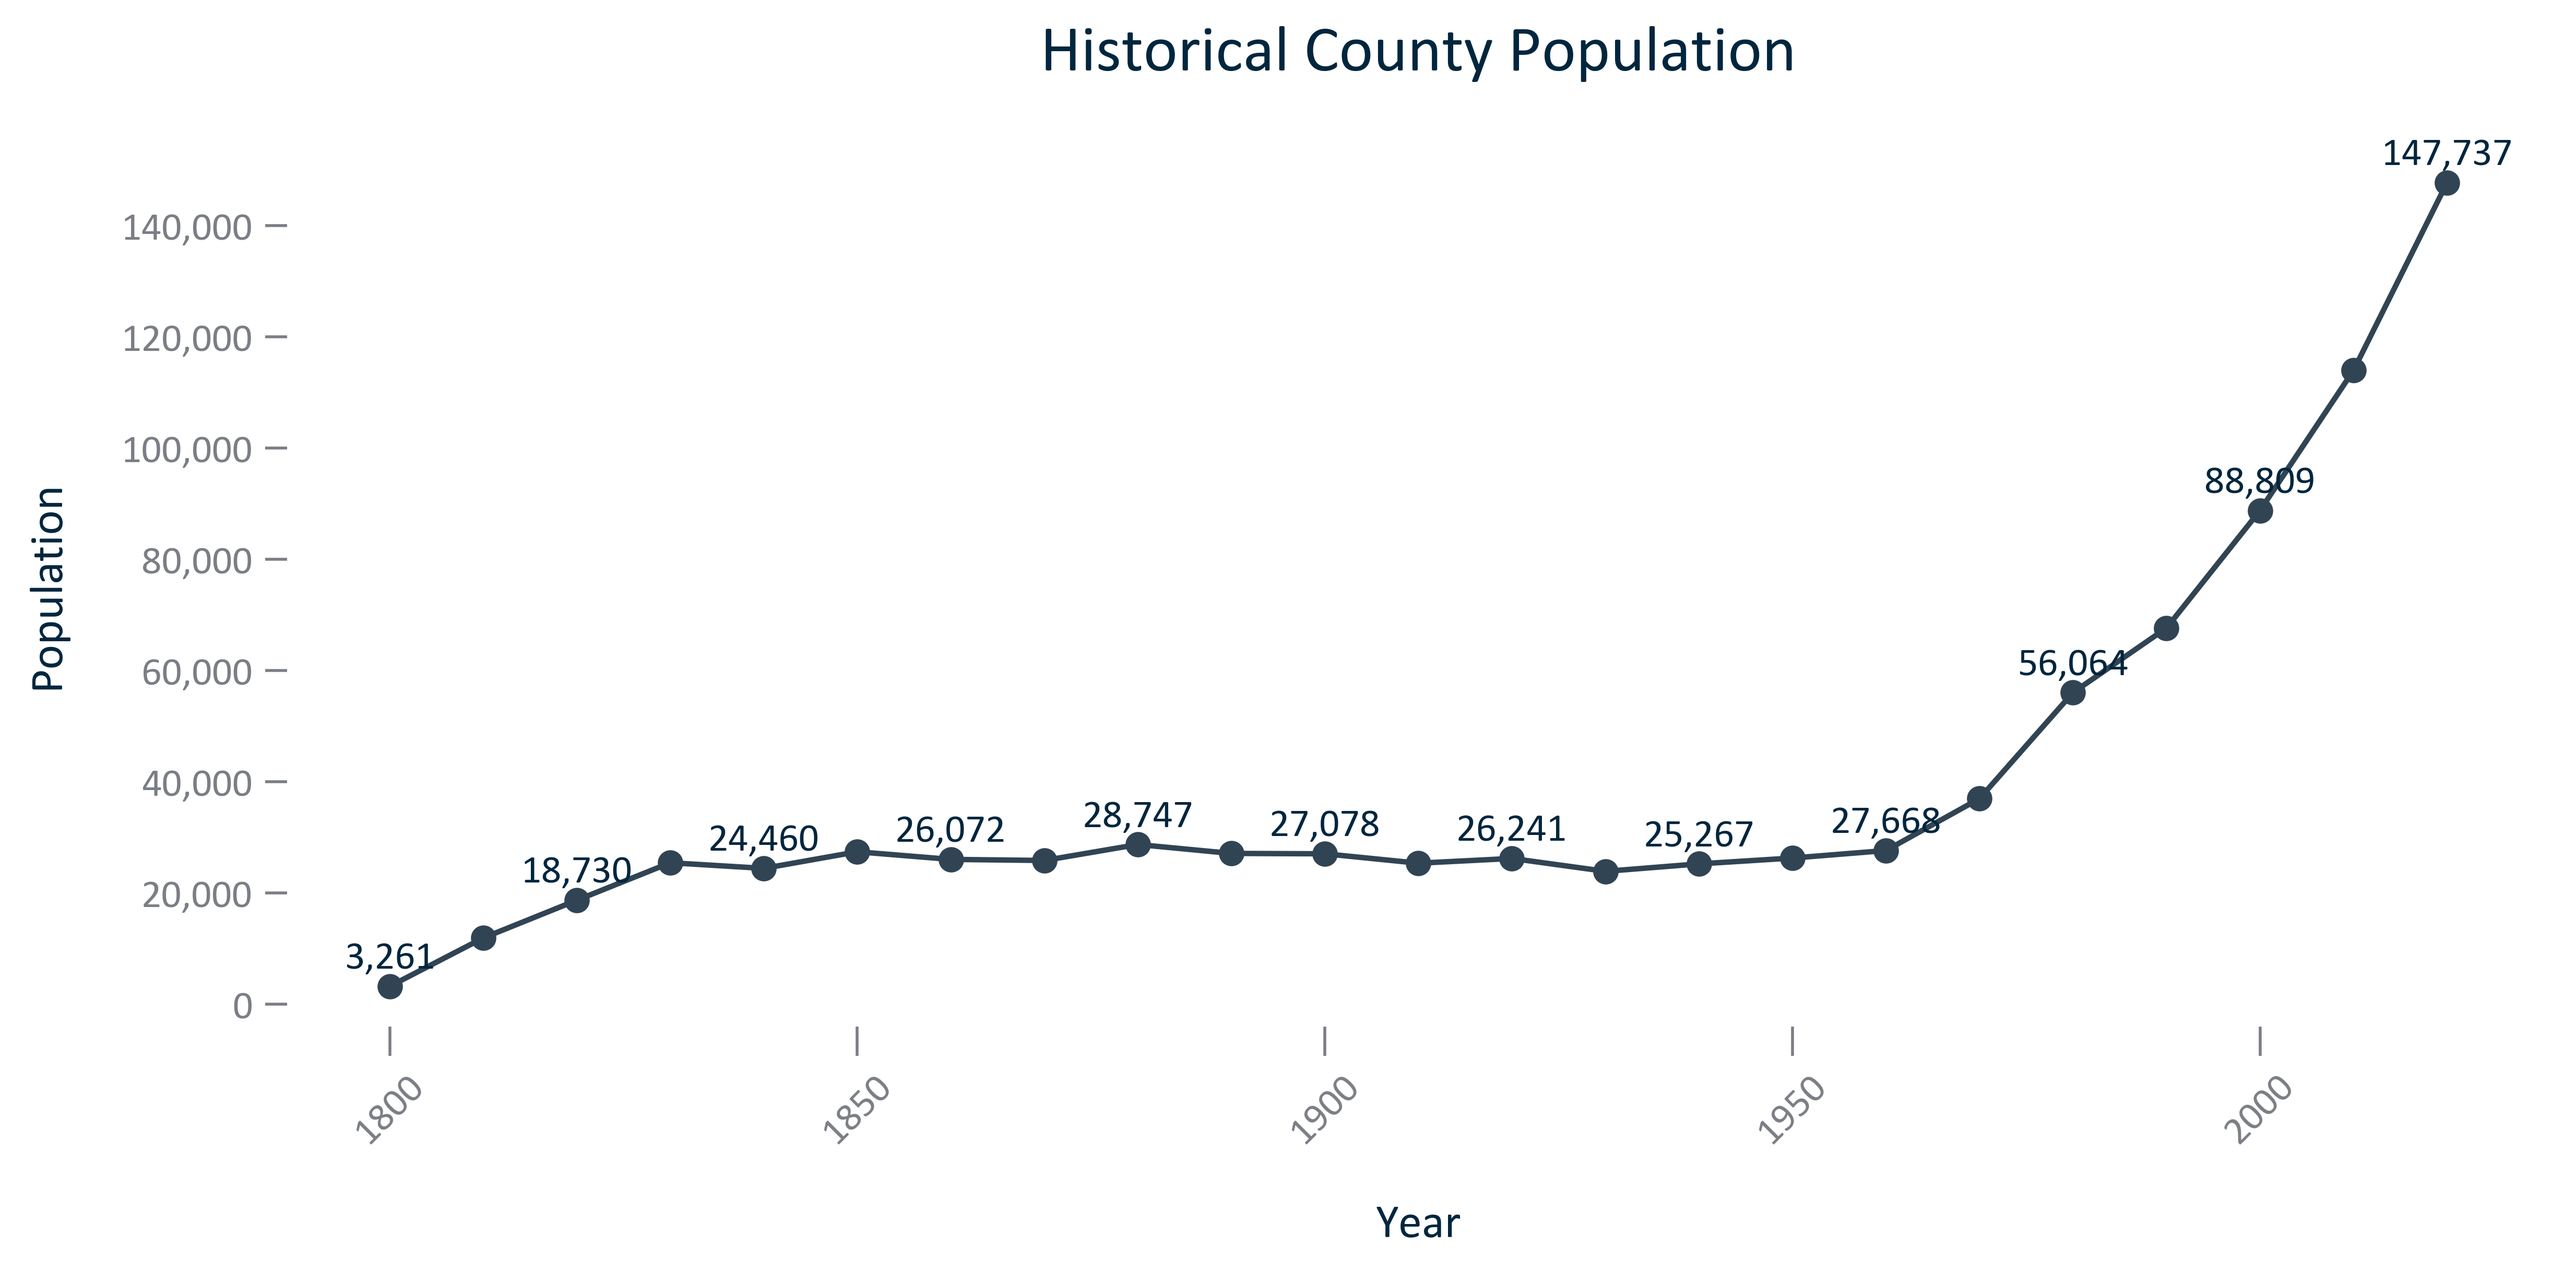

In [18]:
title = 'Historical County Population' #set title of figure
df_temp = historicalpop.loc[historicalpop['NAME'] == county]
df_temp = df_temp.loc[df_temp['Population'] != 0]
df_temp = df_temp.loc[(df_temp['Year'] != 0.0)]
df_temp = df_temp[['NAME', 'Year', 'Population']]#, 'Population Projected']]
#df_temp = df_temp.fillna(0)
#ad-hoc way for replacing the projected 2020 value with the actual... revisit at some point
#df_temp = df_temp.replace(185289.0, 0.0)
#df_temp['Population'] = df_temp['Population'] + df_temp['Population Projected']
xinput = 'Year'
yinput = 'Population'
ylabel = 'Population'
x = df_temp[xinput]
y = df_temp[yinput]
#initiate figure and set parameters
fig, ax = plt.subplots()
#fig.set_figwidth(6.5)
ax.plot(x, y)
ax.set(title = title, xlabel = xinput, ylabel = ylabel)
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
#data labels           
singledatalabels(0, 5, "{:,.0f}", 2, start_idx = 0)
#display and save
fig.savefig('../Figures/POP_line_primarygeo_historicalpopulation_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/POP_line_primarygeo_historicalpopulation_overtime.png', bbox_inches='tight')
with open('../Figures/POP_line_primarygeo_historicalpopulation_overtime.txt', 'w') as text_file:
    text_file.write('Citation: 1900-2020 Decennial Census')
plt.show()
plt.close();

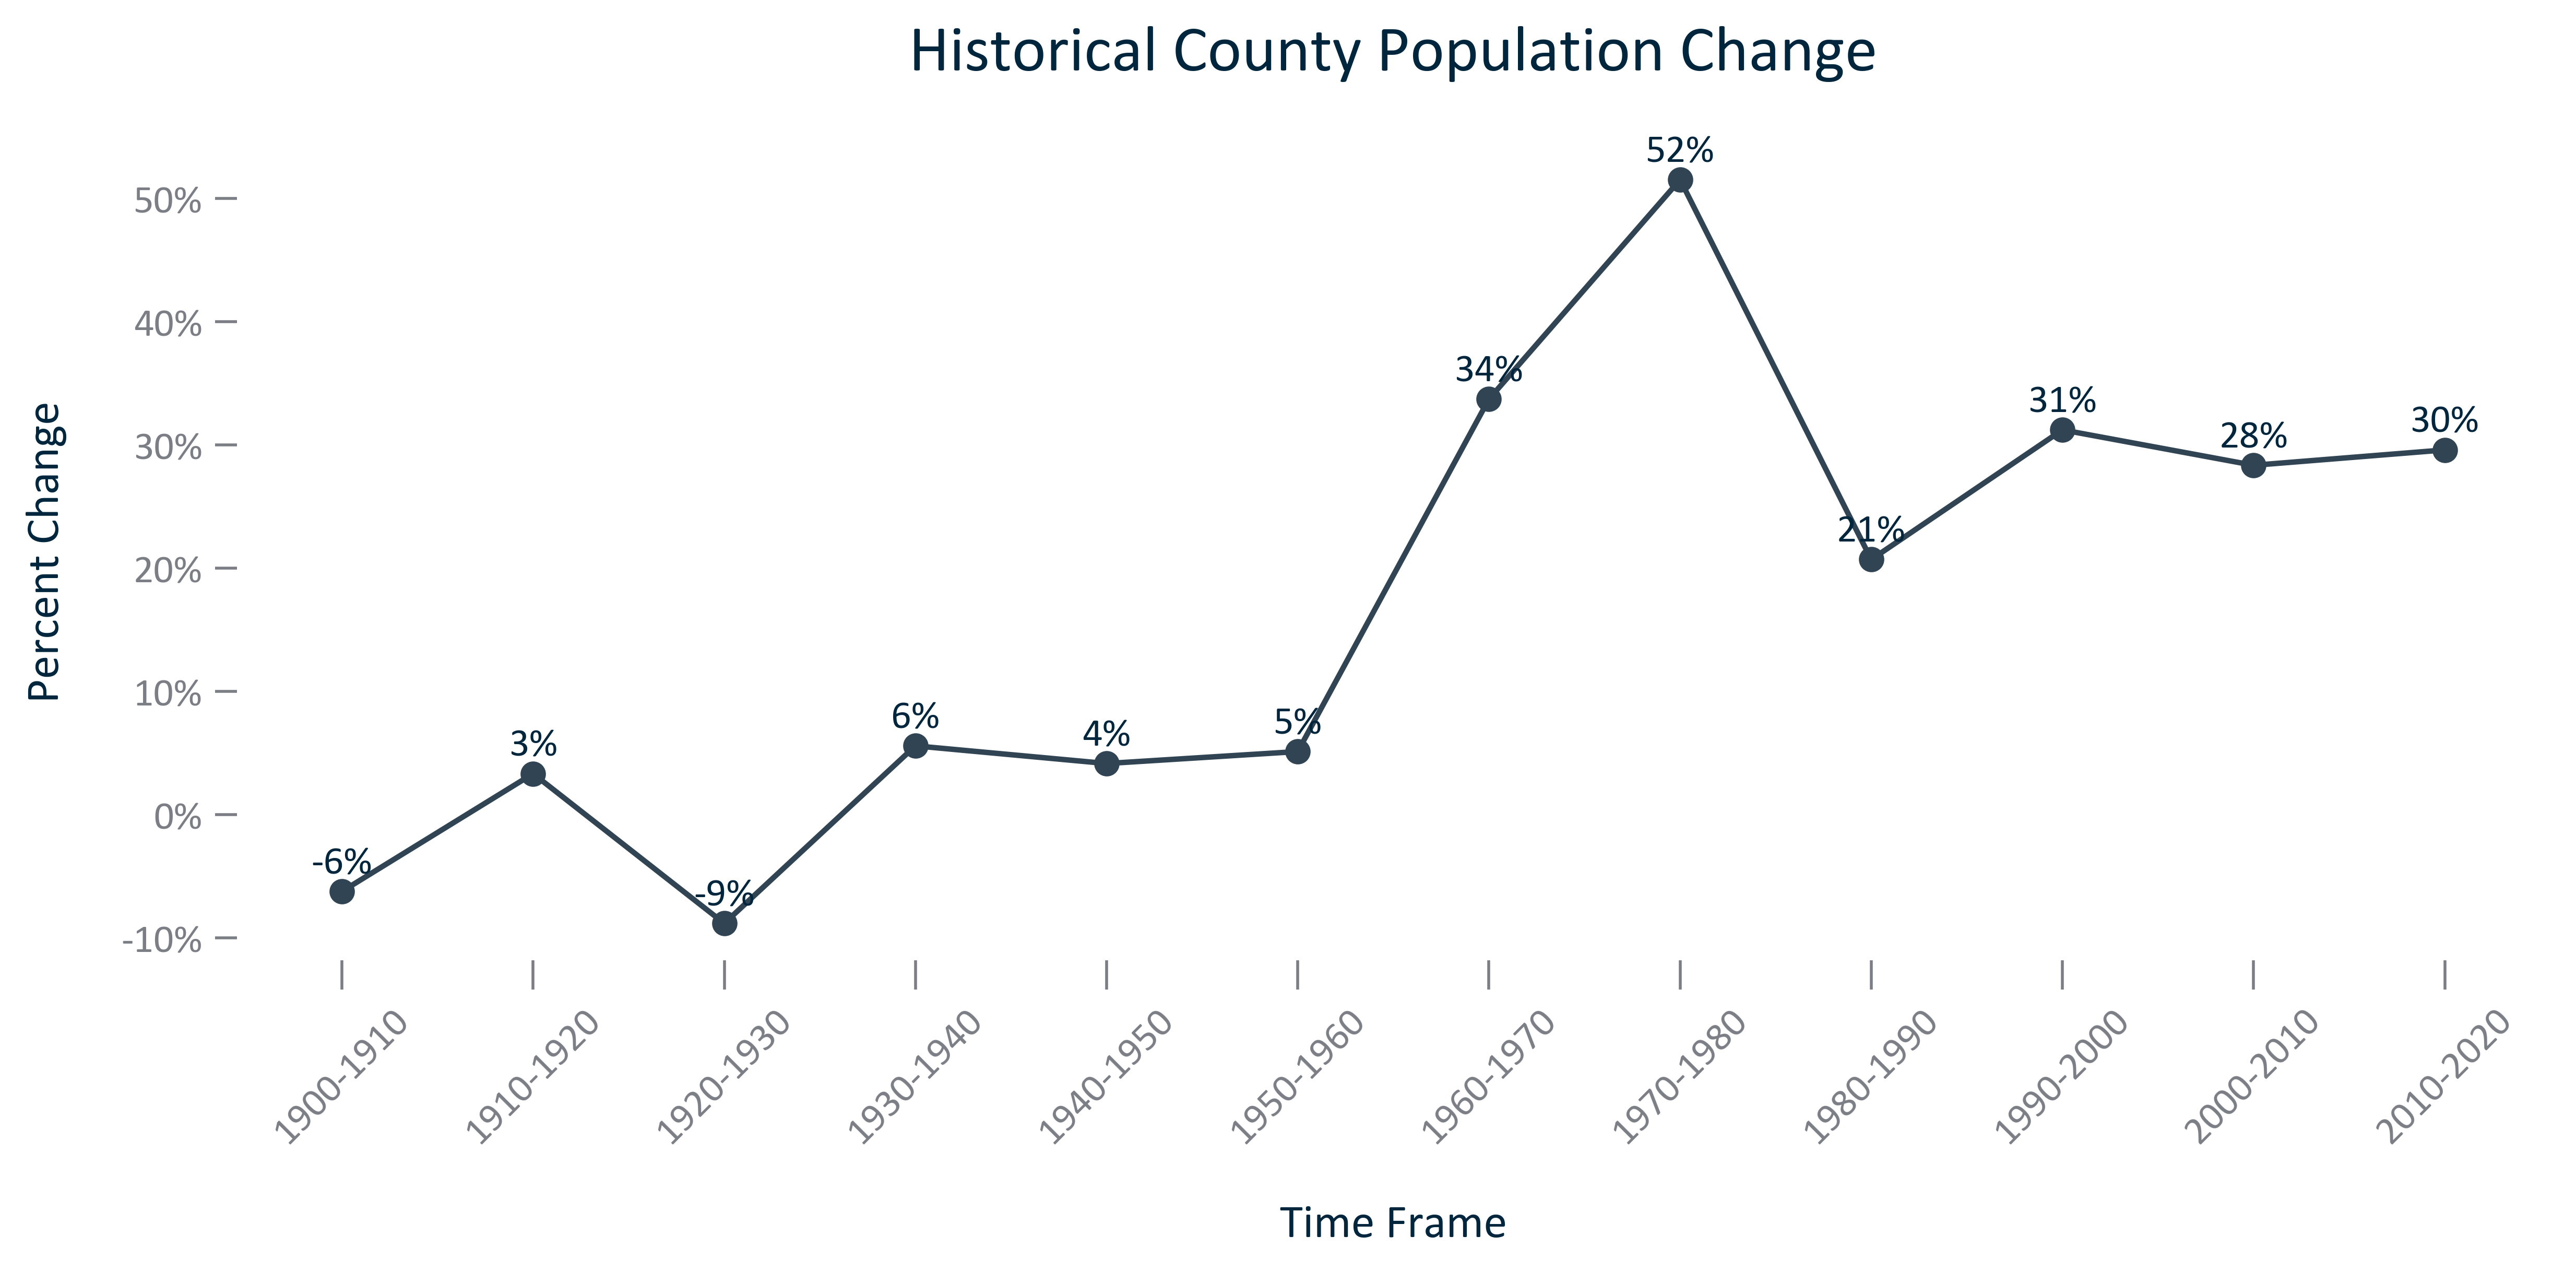

In [19]:
timeframes = ['1900-1910', '1910-1920', '1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970', '1970-1980',
              '1980-1990', '1990-2000', '2000-2010', '2010-2020']
title = 'Historical County Population Change' #set title of figure
df_temp = historicalpop.loc[historicalpop['NAME'] == county]
df_temp = df_temp.loc[df_temp['Time Frame'].isin(timeframes)]
df_temp = df_temp.loc[df_temp['Population % Change'].notnull()]
df_temp = df_temp[['NAME', 'Time Frame', 'Population % Change']]
xinput = 'Time Frame'
yinput = 'Population % Change'
ylabel = 'Percent Change'
x = df_temp[xinput]
y = df_temp[yinput]
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(title = title, xlabel = xinput, ylabel = ylabel)
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
#data labels
singledatalabels(0, 5, "{:,.0f}%", n = 1, start_idx = 0)
# #display and save
fig.savefig('../Figures/POP_line_primarygeo_historicalpopulationchange_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/POP_line_primarygeo_historicalpopulationchange_overtime.png', bbox_inches='tight')
with open('../Figures/POP_line_primarygeo_historicalpopulationchange_overtime.txt', 'w') as text_file:
    text_file.write('Citation: 1900-2020 Decennial Census')
plt.show()
plt.close();